In [1]:
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Sources: Course notes and Walter Gautschi's 'Numerical Analysis'

# Group Work 4:  Numerical Methods for IVP ODEs

## Question 1 - Warm Up

Consider the initial value problem
$$
    x''(x) = \cos(xt), ~~~ x(0) = 1, ~~~ x'(0) = 0, ~~ 0\leq t \leq 1
$$

**(a)** Reformulate the problem as an IVP for a system of ODEs

**(b)** Plot the trajectory using Euler's method, RK2, and RK4.

## Question 2 - Van der Pol Oscillator

Lets find a solution to another oscillator IVP ODE problem just like in the notes (see solution to Van der Pol Oscillator). It is called a Rayleigh Oscillator and is closely related to the Rayleigh differential equation.  The main difference is that the $x^2$ term  is replaced with a $\dot{x}^2$ term.  

Each system has the property that the origin is an unstable equilibrium point and trajectories near it spiral outward until either the $x^2$ or $\dot{x}^2$ get too large and are offset by damping.  

Here is an elegant version of a forced Rayleigh Oscillator with a chaotic solution:
$$ 
    \ddot{x} + (\dot{x}^2-4)\dot{x} + x = 5 \sin(4t)
$$
with the initial condition $(x_0, v_0, t_0) = (-0.9, 4, 0)$.

For more details see Sprott, Julien Clinton. "Elegant Chaos: Algebraically Simple Chaotic Flows." World Scientific

**(a)** Reformulate this problem as an IVP for a system of ODEs. 

Since the formula is $$\ddot{x} + (\dot{x}^2-4)\dot{x} + x = 5 \sin(4t)$$ with the initial condition $(x_0, v_0, t_0) = (-0.9, 4, 0)$

We have: $$\vec{u} = \begin{bmatrix} x \\ \dot{x} \end{bmatrix} = \begin{bmatrix} u_1 \\ u_2 \end{bmatrix}$$
   
$$\frac{\text{d}}{\text{d}t} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} u_2 \\ 5sin(4t) - (u_2^2 - 4)u_2 - u_1 \end{bmatrix} = \vec{f}(t, \vec{u})$$

**(b)** Solve this problem now using a 4 Step Adams-Bashforth using RK2 to start the method.

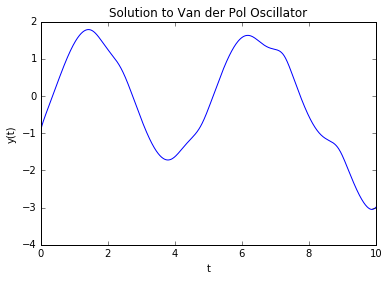

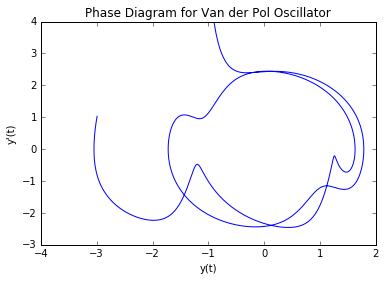

In [7]:
# Use 4-step Adams-Bashforth to compute solution
def f(t, u):
    return numpy.array([u[1], 5.0*numpy.sin(4.0*t) - (u[1]**2 - 4.0)*u[1] - u[0]])


t = numpy.linspace(0.0, 10, 1000)
delta_t = t[1] - t[0]
u_ab4 = numpy.empty((2, 1000))
u_ab4[:, 0] = [-0.9, 4.0]

#RK2 start the method
u_ab4[:, 1] = u_ab4[:, 0] + 0.5 * delta_t * f(t[0], u_ab4[:, 0])
u_ab4[:, 1] = u_ab4[:, 0] + delta_t * f(t[0], u_ab4[:, 1])
u_ab4[:, 2] = u_ab4[:, 1] + 0.5 * delta_t * f(t[1], u_ab4[:, 1])
u_ab4[:, 2] = u_ab4[:, 1] + delta_t * f(t[1], u_ab4[:, 2])
u_ab4[:, 3] = u_ab4[:, 2] + 0.5 * delta_t * f(t[2], u_ab4[:, 2])
u_ab4[:, 3] = u_ab4[:, 2] + delta_t * f(t[2], u_ab4[:, 3])

#4 step Adams-Bashforth
for n in xrange(0,len(t)-4):
    u_ab4[:, n+4] = u_ab4[:, n + 3] + delta_t * (-9.0*f(t[n], u_ab4[:, n]) + 37.0 * f(t[n+1], u_ab4[:, n+1]) - 59.0*f(t[n+2], u_ab4[:, n+2]) + 55.0*f(t[n+3], u_ab4[:, n+3])) / 24.0 
#print u_ab4
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(t, u_ab4[0,:])
axes.set_title("Solution to Van der Pol Oscillator")
axes.set_xlabel("t")
axes.set_ylabel("y(t)")

fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

axes.plot(u_ab4[0,:], u_ab4[1, :])
axes.set_title("Phase Diagram for Van der Pol Oscillator")
axes.set_xlabel("y(t)")
axes.set_ylabel("y'(t)")

plt.show()

## Question 3 - Absolute Stability Regions and Order Stars

**(a)** Plot the regions of absolute stability for the following:
1. Taylor Series methods of order 2 to 5,
1. 3-step and 4-step Adams-Basforth methods, and
1. 3-step and 4-step Adams-Moulton methods.

For the Taylor series methods also determine the interior and exterior of the stability regions.

**(b)** The region of absolute stability as defined ensures that the error does not grow in subsequent time-steps hence why we require $|R(z)| < 1$.  In reality what we really want is that the errors decay faster than the solution or that it grows slower than the true solution.  Consider the solution of an ODE $u(t) = e^{\lambda t}$, if $\lambda < 0$ then we want our errors made at each time step $E^n$ to decay faster than $e^{\lambda t}$ so that $|E^n| < e^{\lambda t}$.  Conversely if $\lambda > 0$ then we might also want $|E^n| < e^{\lambda t}$.  This suggests a new definition of stability, called the **relative stability** defined as

$$|R(z)| \leq |e^z|.$$

These turn out to be difficult to plot but proved pivotal due to work in 1978 by Wanner, Hairer and Nørset.  More recently a new set of regions, called **order stars**, have become more popular to consider.  These are defined as the three regions

$$\begin{aligned}
    \mathcal{A}_{-} &= \{ z \in \mathbb{C}: |R(z)| < |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| < 1\}, \\ 
    \mathcal{A}_{0} &= \{ z \in \mathbb{C}: |R(z)| = |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| = 1\}, ~~~~\text{and} \\
    \mathcal{A}_{+} &= \{ z \in \mathbb{C}: |R(z)| > |e^z| \} = \{z \in \mathbb{C}: |e^{-z} R(z)| > 1\}.
\end{aligned}$$

Plot the region $\mathcal{A}_{0}$ for the Taylor series methods asked for in part (a).  Do you see any relation to the number of "fingers" and the order of the method?